# CS619 Data Mining Final Project

Aayushi Verma (#U01865004)

## Project Synopsis

In this research project, I perform an extensive algorithm and dataset split analysis in order to determine the best possible combination of algorithm(s) and dataset split which yields the most accurate classification results. For this purpose, a dataset containing morphological measurements of Turkish pumpkin seeds is used, along with 10 algorithms, and 4 dataset splits. Detailed analysis is performed and described in this research, and concluded with the best inferred algorithm and dataset split combination.

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

The dataset used in this research is the ‘Pumpkin Seeds’ dataset, available from [Kaggle](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset). This dataset is from a 2021 study on two species of pumpkin seeds, and their morphological features. The dataset comprises of 2500 records of the morphological features of both types of pumpkin seeds (cercevelik, urgup sivirsi). The values of the morphology of the seeds were obtained using 2-dimensional image processing techniques in [Koklu et al., 2021](https://link.springer.com/article/10.1007/s10722-021-01226-0).

<img src="datafiles/pumpkin_seeds.jpg" width="272" height="432">

In [2]:
# reading the raw data file and obtaining a summary of results
df0 = pd.read_csv('datafiles/code_input/Pumpkin_Seeds.csv')
df0.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

In [3]:
# generating a correlation matrix to see how the variables are related to each other
X = df0.drop('Class', axis = 1)
y = df0['Class']
corr = X.corr()
corr.style.background_gradient('coolwarm')

In this correlation matrix, we observe that red indicates a high degree of correlation, whereas blue indicates a low degree of correlation.

## Classification

The classification of pumpkin seeds is performed using [WEKA software](https://www.cs.waikato.ac.nz/ml/index.html), which is a graphical software used for performing classifications. The results obtained from the classification schemes were manually inputted into a CSV. We will read the CSV of obtained results in the next section.

The aim of this research is to compare different classification algorithms and their efficiency in predicting the class of pumpkin seed in the following dataset scenarios:
- data split into training/testing split of 60\%/40\%.
- data split into training/testing split of 80\%/20\%.
- data split according to 5-fold cross validation.
- data split according to 10-fold cross validation.

The following data mining techniques were used to evaluate the performance of the algorithms on the aforementioned data train/test splits:
- Decision Stump: algorithm returning a single-level decision tree to make a prediction based on the value of a single attribute.
- Decision Table: algorithm returning set of rules to classify the class attribute.
- IBk (k-NN): algorithm for k-nearest neighbors classification scheme. 
- OneR: algorithm returning a single-level decision tree to make a prediction based on the value of a single attribute.
- C4.5 (J48) pruned: algorithm returning a pruned decision tree for classifying the attributes.
- C4.5 (J48) unpruned: algorithm returning an unpruned decision tree for classifying the attributes.
- Logistic Regression: linear regression algorithm to classify instances according to regressions for each class.
- k-Star: algorithm for instance-based classification using a distance function, e.g Euclidean distance function.
- Naive Bayes: algorithm based on Bayes' rule, assuming independent probabilities of attributes. 
- SMO: algorithm using a support vector classifier to train the attributes.

## Post-Classification Results Analysis

In this section, we will analyze the results from the classifications.

In [4]:
# reading and summarizing CSV of classification results
df = pd.read_csv('datafiles/code_input/classification_results.csv')
df.rename({'Unnamed: 0':'traintype'},axis=1,inplace=True)
df.groupby('traintype').count()

Algorithm  CorrectPercent  MAE  RMSE  TPRate  FPRate  Precision  \
traintype                                                                     
cv10               10              10   10    10      10      10         10   
cv5                10              10   10    10      10      10         10   
train60-te         10              10   10    10      10      10         10   
train60-tr         10              10   10    10      10      10         10   
train80-te         10              10   10    10      10       0         10   
train80-tr         10              10   10    10      10      10         10   

            Recall  Fmeasure  ROCArea  TP  FP  FN  TN  
traintype                                              
cv10            10        10       10  10  10  10  10  
cv5             10        10       10  10  10  10  10  
train60-te      10        10       10  10  10  10  10  
train60-tr      10        10       10  10  10  10  10  
train80-te      10        10        0  10  10  10  10  
train80-tr      10        10       10  10  10  10  10

In [5]:
# checking to see what the results table looks like
df.head()

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
0  train60-tr  DecisionStump         87.4667  0.2189  0.3308   0.875   0.129   
1  train60-te  DecisionStump         85.3000  0.2346  0.3545   0.853   0.148   
2  train60-tr  DecisionTable         89.8667  0.1745  0.2783   0.899   0.106   
3  train60-te  DecisionTable         87.2000  0.1985  0.3093   0.872   0.129   
4  train60-tr            IBk        100.0000  0.0007  0.0007   1.000   0.000   

   Precision  Recall  Fmeasure  ROCArea   TP  FP   FN   TN  
0      0.875   0.875     0.874    0.873  719  73  115  593  
1      0.854   0.853     0.853    0.853  447  61   86  406  
2      0.900   0.899     0.898    0.954  742  50  102  606  
3      0.874   0.872     0.872    0.936  461  47   81  411  
4      1.000   1.000     1.000    1.000  792   0    0  708

In [6]:
# if we are interesting in only looking at the training results, we can use this dataframe.
training_data_only = df[(df['traintype']!='train60-te') & (df['traintype']!='train80-te')].sort_values('CorrectPercent',ascending=False)

Now that we have performed some exploratory data analysis and examined the classification results table, we are ready to begin the real analysis!

In [7]:
# creating individual dataframes corresponding to each sub-category of data split
# we are treating the training and testing datasets separate for the percentage splits
train60_tr = df[df["traintype"]=="train60-tr"]
train60_te = df[df["traintype"]=="train60-te"]
train80_tr = df[df["traintype"]=="train80-tr"]
train80_te = df[df["traintype"]=="train80-te"]
cv10 = df[df["traintype"]=="cv10"]
cv5 = df[df["traintype"]=="cv5"]

Now we will inspect each of the 6 subsets of the data splits according to the percentage of correctly-classified instances.

In [8]:
train60_tr.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
4   train60-tr            IBk        100.0000  0.0007  0.0007   1.000   0.000   
10  train60-tr          kStar        100.0000  0.0000  0.0004   1.000   0.000   
8   train60-tr   J48-unpruned         90.9333  0.1405  0.2651   0.909   0.096   
6   train60-tr     J48-pruned         90.8667  0.1483  0.2723   0.909   0.096   
2   train60-tr  DecisionTable         89.8667  0.1745  0.2783   0.899   0.106   
12  train60-tr       Logistic         89.5333  0.1651  0.2854   0.895   0.108   
16  train60-tr           OneR         88.6000  0.1140  0.3376   0.886   0.119   
18  train60-tr            SMO         87.6667  0.1233  0.3512   0.877   0.128   
0   train60-tr  DecisionStump         87.4667  0.2189  0.3308   0.875   0.129   
14  train60-tr     NaiveBayes         87.2000  0.1351  0.3398   0.872   0.132   

    Precision  Recall  Fmeasure  ROCArea   TP  FP   FN   TN  
4       1.000   1.000     1.000    1.000  792   0    0  708  
10      1.000   1.000     1.000    1.000  792   0    0  708  
8       0.911   0.909     0.909    0.956  753  39   97  611  
6       0.911   0.909     0.908    0.943  752  40   97  611  
2       0.900   0.899     0.898    0.954  742  50  102  606  
12      0.896   0.895     0.895    0.952  730  62   95  613  
16      0.888   0.886     0.886    0.883  736  56  115  593  
18      0.878   0.877     0.876    0.874  727  65  120  588  
0       0.875   0.875     0.874    0.873  719  73  115  593  
14      0.873   0.872     0.872    0.937  716  76  116  592

In [9]:
train60_te.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
13  train60-te       Logistic            87.8  0.1786  0.2989   0.878   0.123   
7   train60-te     J48-pruned            87.7  0.1765  0.3140   0.877   0.124   
9   train60-te   J48-unpruned            87.7  0.1732  0.3136   0.877   0.124   
3   train60-te  DecisionTable            87.2  0.1985  0.3093   0.872   0.129   
19  train60-te            SMO            86.8  0.1320  0.3633   0.868   0.133   
15  train60-te     NaiveBayes            86.6  0.1377  0.3413   0.866   0.135   
1   train60-te  DecisionStump            85.3  0.2346  0.3545   0.853   0.148   
17  train60-te           OneR            84.7  0.1530  0.3912   0.847   0.154   
11  train60-te          kStar            82.5  0.1800  0.3972   0.825   0.176   
5   train60-te            IBk            81.2  0.1884  0.4333   0.812   0.188   

    Precision  Recall  Fmeasure  ROCArea   TP  FP  FN   TN  
13      0.878   0.878     0.878    0.942  456  52  70  422  
7       0.878   0.877     0.877    0.912  462  46  77  415  
9       0.878   0.877     0.877    0.920  462  46  77  415  
3       0.874   0.872     0.872    0.936  461  47  81  411  
19      0.870   0.868     0.868    0.867  559  49  83  409  
15      0.867   0.866     0.866    0.933  455  53  81  411  
1       0.854   0.853     0.853    0.853  447  61  86  406  
17      0.848   0.847     0.847    0.794  446  62  91  401  
11      0.825   0.825     0.825    0.898  431  77  98  394  
5       0.812   0.812     0.812    0.812  418  90  98  394

In [10]:
train80_tr.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
24  train80-tr            IBk          100.00  0.0005  0.0005   1.000   0.000   
30  train80-tr          kStar          100.00  0.0005  0.0099   1.000   0.000   
28  train80-tr   J48-unpruned           90.35  0.1404  0.2650   0.904   0.086   
26  train80-tr     J48-pruned           90.30  0.1439  0.2682   0.903   0.086   
22  train80-tr  DecisionTable           88.20  0.1839  0.2942   0.882   0.119   
32  train80-tr       Logistic           88.15  0.1786  0.2978   0.882   0.122   
36  train80-tr           OneR           87.05  0.1295  0.3599   0.871   0.137   
38  train80-tr            SMO           86.05  0.1395  0.3735   0.861   0.146   
34  train80-tr     NaiveBayes           85.60  0.1485  0.3569   0.856   0.137   
20  train80-tr  DecisionStump           85.45  0.2392  0.3458   0.855   0.135   

    Precision  Recall  Fmeasure  ROCArea   TP   FP   FN    TN  
24      1.000   1.000     1.000    1.000  800    0    0  1200  
30      1.000   1.000     1.000    1.000  800    0    0  1200  
28      0.908   0.904     0.904    0.958  748   52  141  1059  
26      0.908   0.903     0.904    0.956  748   52  142  1058  
22      0.884   0.882     0.882    0.944  703   97  139  1061  
32      0.883   0.882     0.882    0.946  698  102  135  1065  
36      0.871   0.871     0.871    0.867  678  122  137  1063  
38      0.861   0.861     0.861    0.857  672  128  151  1049  
34      0.862   0.856     0.857    0.933  701   99  189  1011  
20      0.862   0.855     0.856    0.860  710   90  201   999

In [11]:
train80_te.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
35  train80-te     NaiveBayes            92.2  0.0905  0.2615   0.922     NaN   
21  train80-te  DecisionStump            91.6  0.2792  0.3395   0.916     NaN   
27  train80-te     J48-pruned            91.4  0.1833  0.3060   0.914     NaN   
29  train80-te   J48-unpruned            91.4  0.1801  0.3011   0.914     NaN   
33  train80-te       Logistic            90.6  0.1968  0.2826   0.906     NaN   
39  train80-te            SMO            88.0  0.1200  0.3464   0.880     NaN   
23  train80-te  DecisionTable            86.4  0.2316  0.3179   0.864     NaN   
37  train80-te           OneR            84.4  0.1560  0.3950   0.844     NaN   
25  train80-te            IBk            82.0  0.1803  0.4241   0.820     NaN   
31  train80-te          kStar            81.6  0.1861  0.3959   0.816     NaN   

    Precision  Recall  Fmeasure  ROCArea   TP  FP  FN  TN  
35        1.0   0.922     0.959      NaN  461  39   0   0  
21        1.0   0.916     0.956      NaN  458  42   0   0  
27        1.0   0.914     0.955      NaN  457  43   0   0  
29        1.0   0.914     0.955      NaN  457  43   0   0  
33        1.0   0.906     0.951      NaN  453  47   0   0  
39        1.0   0.880     0.936      NaN  440  60   0   0  
23        1.0   0.864     0.927      NaN  432  68   0   0  
37        1.0   0.844     0.915      NaN  422  78   0   0  
25        1.0   0.820     0.901      NaN  410  90   0   0  
31        1.0   0.816     0.899      NaN  408  92   0   0

In [12]:
cv10.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
56      cv10       Logistic           88.68  0.1726  0.2931   0.887   0.115   
53      cv10     J48-pruned           87.56  0.1777  0.3159   0.876   0.126   
54      cv10   J48-unpruned           87.44  0.1694  0.3122   0.874   0.128   
59      cv10            SMO           87.08  0.1292  0.3594   0.871   0.132   
51      cv10  DecisionTable           86.76  0.1950  0.3109   0.868   0.135   
57      cv10     NaiveBayes           86.72  0.1373  0.3416   0.867   0.135   
50      cv10  DecisionStump           85.60  0.2371  0.3488   0.856   0.149   
58      cv10           OneR           84.12  0.1588  0.3985   0.841   0.161   
55      cv10          kStar           84.04  0.1639  0.3776   0.840   0.160   
52      cv10            IBk           82.28  0.1775  0.4208   0.823   0.178   

    Precision  Recall  Fmeasure  ROCArea    TP   FP   FN    TN  
56      0.887   0.887     0.887    0.947  1187  113  170  1030  
53      0.876   0.876     0.876    0.914  1162  138  173  1027  
54      0.875   0.874     0.874    0.919  1172  128  186  1014  
59      0.872   0.871     0.871    0.869  1174  126  197  1003  
51      0.868   0.868     0.867    0.934  1169  131  200  1000  
57      0.868   0.867     0.867    0.936  1168  132  200  1000  
50      0.860   0.856     0.855    0.862  1192  108  252   948  
58      0.842   0.841     0.841    0.840  1127  173  224   976  
55      0.840   0.840     0.840    0.907  1096  204  195  1005  
52      0.823   0.823     0.823    0.822  1086  214  229   971

In [13]:
cv5.sort_values('CorrectPercent',ascending=False)

traintype      Algorithm  CorrectPercent     MAE    RMSE  TPRate  FPRate  \
46       cv5       Logistic           88.60  0.1725  0.2931   0.886   0.116   
44       cv5   J48-unpruned           88.04  0.1704  0.3101   0.880   0.122   
43       cv5     J48-pruned           87.96  0.1740  0.3127   0.880   0.123   
41       cv5  DecisionTable           87.16  0.1966  0.3111   0.872   0.131   
49       cv5            SMO           87.04  0.1296  0.3600   0.870   0.132   
47       cv5     NaiveBayes           86.80  0.1372  0.3416   0.868   0.135   
40       cv5  DecisionStump           85.76  0.2356  0.3480   0.858   0.147   
48       cv5           OneR           83.96  0.1604  0.4005   0.840   0.163   
45       cv5          kStar           83.52  0.1671  0.3825   0.835   0.165   
42       cv5            IBk           82.52  0.1751  0.4179   0.825   0.176   

    Precision  Recall  Fmeasure  ROCArea    TP   FP   FN    TN  
46      0.887   0.886     0.886    0.947  1189  111  174  1026  
44      0.881   0.880     0.880    0.924  1179  121  178  1022  
43      0.880   0.880     0.879    0.923  1177  123  178  1022  
41      0.872   0.872     0.871    0.931  1174  126  195  1005  
49      0.871   0.870     0.870    0.869  1176  124  200  1000  
47      0.869   0.868     0.868    0.936  1168  132  198  1002  
40      0.861   0.858     0.857    0.859  1187  113  243   957  
48      0.840   0.840     0.839    0.838  1131  169  232   968  
45      0.835   0.835     0.835    0.906  1087  213  199  1001  
42      0.825   0.825     0.825    0.824  1096  204  233   967

### Trained Dataset Evaluation

Interesting. Let's now do a quantitative analysis on the training datasets (train60_tr, train80_tr, cv5, cv10). We will start by plotting the percentage of correctly-classified instances, and the MAE.

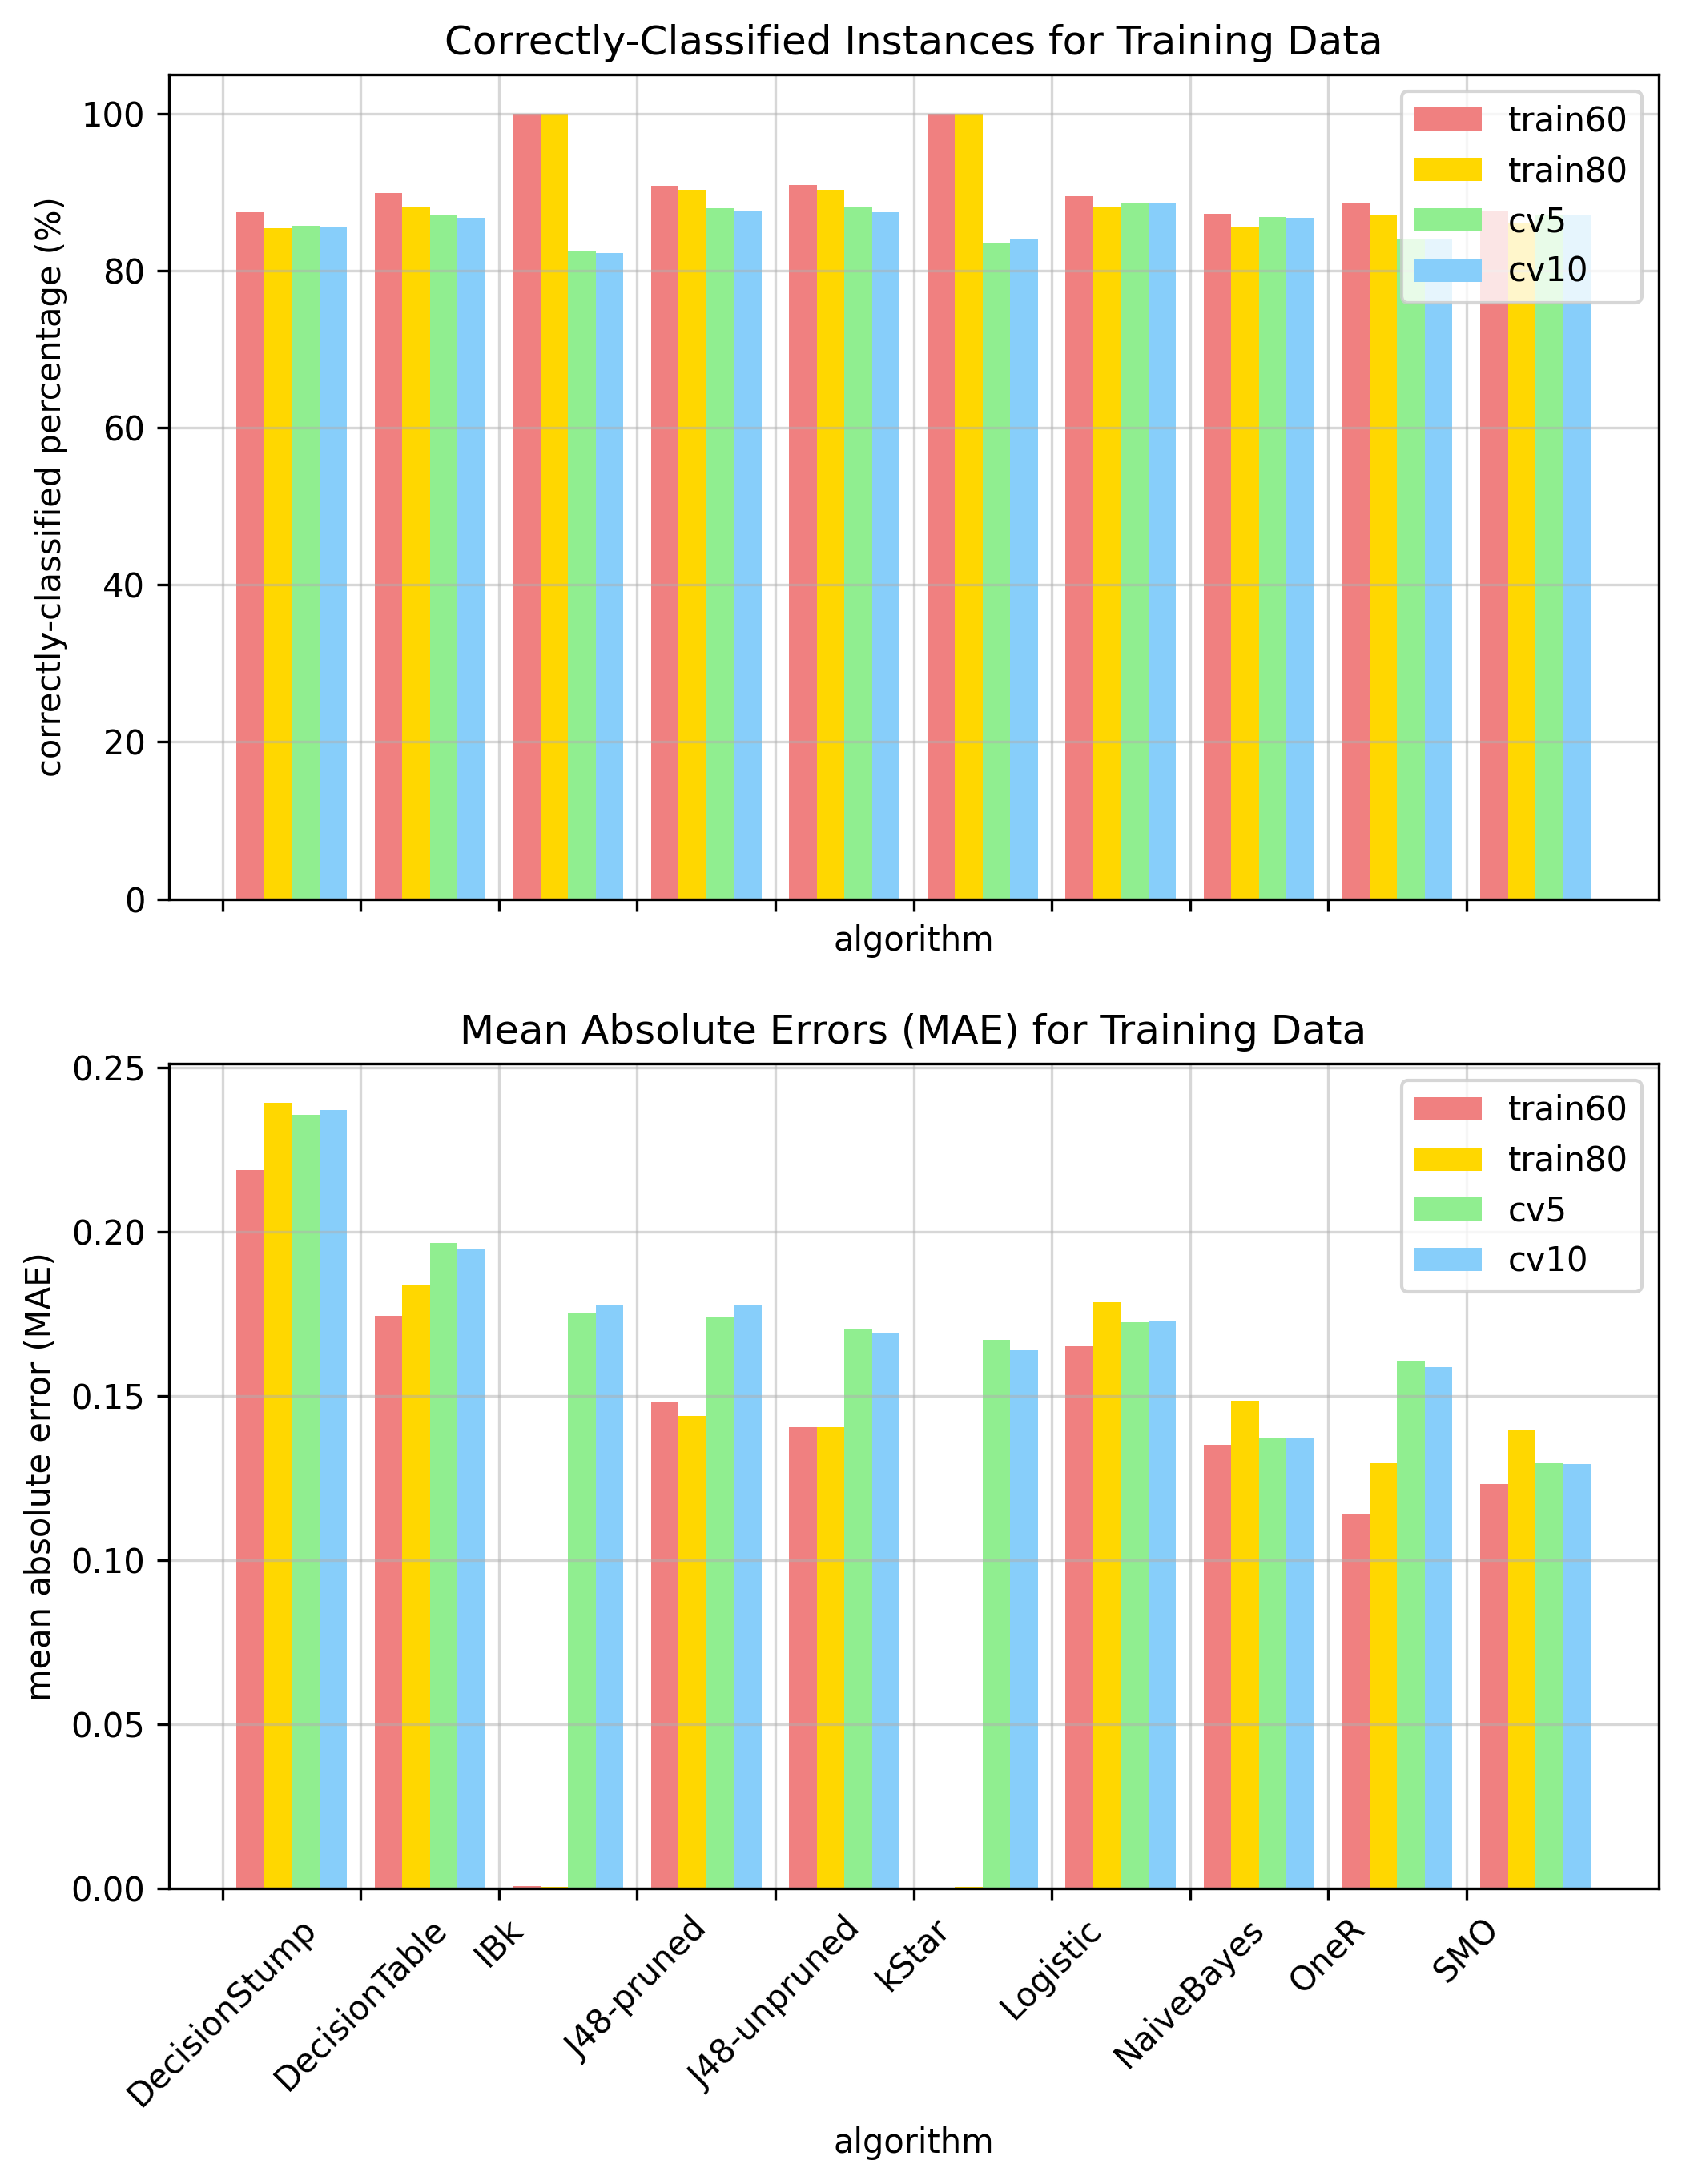

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(8, 10), dpi=300)
x_labels = train60_tr["Algorithm"].tolist()
x_train60_tr = np.arange(len(x_labels))
width = 0.2

# row=0, col=0
ax[0].bar(x_train60_tr+width,train60_tr["CorrectPercent"],width,color="lightcoral",alpha=1,label="train60") 
ax[0].bar(x_train60_tr+width*2,train80_tr["CorrectPercent"],width,color="gold",alpha=1,label="train80")
ax[0].bar(x_train60_tr+width*3,cv5["CorrectPercent"],width,color="lightgreen",alpha=1,label="cv5") 
ax[0].bar(x_train60_tr+width*4,cv10["CorrectPercent"],width,color="lightskyblue",alpha=1,label="cv10")
ax[0].grid(True,alpha=0.5)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel('correctly-classified percentage (%)')
ax[0].set_title('Correctly-Classified Instances for Training Data')
ax[0].legend()

# row=1, col=0
ax[1].bar(x_train60_tr+width,train60_tr["MAE"],width,color="lightcoral",alpha=1,label="train60") 
ax[1].bar(x_train60_tr+width*2,train80_tr["MAE"],width,color="gold",alpha=1,label="train80")
ax[1].bar(x_train60_tr+width*3,cv5["MAE"],width,color="lightgreen",alpha=1,label="cv5") #row=0, col=0
ax[1].bar(x_train60_tr+width*4,cv10["MAE"],width,color="lightskyblue",alpha=1,label="cv10")
ax[1].grid(True,alpha=0.5)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel('mean absolute error (MAE)')
ax[1].set_title('Mean Absolute Errors (MAE) for Training Data')
ax[1].set_xticks(x_train60_tr, x_labels, rotation=45)
ax[1].legend()

plt.savefig("plots/combined_training_percent_and_mae.jpg",dpi=300)

In [15]:
# we will rank the percentage of correctly-classified instances for each algorithm together to compare
print(train60_tr.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])
print(train80_tr.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])
print(cv5.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])
print(cv10.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])

        Algorithm  CorrectPercent
4             IBk        100.0000
10          kStar        100.0000
8    J48-unpruned         90.9333
6      J48-pruned         90.8667
2   DecisionTable         89.8667
12       Logistic         89.5333
16           OneR         88.6000
18            SMO         87.6667
0   DecisionStump         87.4667
14     NaiveBayes         87.2000
        Algorithm  CorrectPercent
24            IBk          100.00
30          kStar          100.00
28   J48-unpruned           90.35
26     J48-pruned           90.30
22  DecisionTable           88.20
32       Logistic           88.15
36           OneR           87.05
38            SMO           86.05
34     NaiveBayes           85.60
20  DecisionStump           85.45
        Algorithm  CorrectPercent
46       Logistic           88.60
44   J48-unpruned           88.04
43     J48-pruned           87.96
41  DecisionTable           87.16
49            SMO           87.04
47     NaiveBayes           86.80
40  DecisionSt

In [16]:
# we will rank the Mean Absolute Error (MAE) for each algorithm together to compare
print(train60_tr.sort_values('MAE',ascending=False)[['Algorithm','MAE']])
print(train80_tr.sort_values('MAE',ascending=False)[['Algorithm','MAE']])
print(cv5.sort_values('MAE',ascending=False)[['Algorithm','MAE']])
print(cv10.sort_values('MAE',ascending=False)[['Algorithm','MAE']])

        Algorithm     MAE
0   DecisionStump  0.2189
2   DecisionTable  0.1745
12       Logistic  0.1651
6      J48-pruned  0.1483
8    J48-unpruned  0.1405
14     NaiveBayes  0.1351
18            SMO  0.1233
16           OneR  0.1140
4             IBk  0.0007
10          kStar  0.0000
        Algorithm     MAE
20  DecisionStump  0.2392
22  DecisionTable  0.1839
32       Logistic  0.1786
34     NaiveBayes  0.1485
26     J48-pruned  0.1439
28   J48-unpruned  0.1404
38            SMO  0.1395
36           OneR  0.1295
24            IBk  0.0005
30          kStar  0.0005
        Algorithm     MAE
40  DecisionStump  0.2356
41  DecisionTable  0.1966
42            IBk  0.1751
43     J48-pruned  0.1740
46       Logistic  0.1725
44   J48-unpruned  0.1704
45          kStar  0.1671
48           OneR  0.1604
47     NaiveBayes  0.1372
49            SMO  0.1296
        Algorithm     MAE
50  DecisionStump  0.2371
51  DecisionTable  0.1950
53     J48-pruned  0.1777
52            IBk  0.1775
56       Log

We note that the algorithm with the lowest consistent MAE appears to be the SMO algorithm, which has an average MAE of 0.1304. This suggests that regardless of the choice of dataset splits, the SMO algorithm could prove to a consistently accurate classification algorithm for pumpkin seeds. Let's find out the average percentage of correctly-classified instances and MAE for the SMO algorithm.

In [17]:
# we can write a generic function to find the average value of a column for a specified algorithm
def finding_the_avg(dfs,algorithm,required_col):
    to_take_avg = []
    for a_df in dfs:
        to_take_avg.append(a_df[a_df["Algorithm"]==algorithm][required_col].tolist()[0])
    return np.average(to_take_avg)

In [18]:
# creating list of dfs we want to find the average value for
dfs = [train60_tr,train80_tr,cv5,cv10]

# average percentage of correctly-classified instances returned for all 4 training subsets of data splits for an algorithm
print("Avg. Percentage of Correctly-Classified Instances for SMO: ",finding_the_avg(dfs,algorithm="SMO",required_col="CorrectPercent"))

# average MAE returned for all 4 training subsets of data splits for an algorithm
print("Avg. MAE for SMO: ",finding_the_avg(dfs,algorithm="SMO",required_col="MAE"))

Avg. Percentage of Correctly-Classified Instances for SMO:  86.959175
Avg. MAE for SMO:  0.13040000000000002


We find that the train60-tr and train80-tr training split datasets generally have a higher percentage of correctly-classified instances, compared to the cross-validation methods. The IBk and k-Star algorithms applied to the train60-tr and train80-tr dataset splits classified all instances 100\% correctly. We note the corresponding Mean Absolute Error (MAE) for these algorithms, which are 0. This is due to the "lazy" nature of these classification algorithms. 

We observe that all algorithms applied to all 4 training datasets correctly classified at least 80\% instances. Specifically, the IBk algorithm using the 10-fold cross-validation method correctly classified the least amount of instances, totaling only 82.28\%, and barring the IBk and k-Star methods, the next highest amount of correctly-classified instances was done with the J48 unpruned algorithm on the train60-tr dataset split. From this, we learn that a relatively low percentage split of the data, combined with the J48 algorithm appears to provide good classification model results.

In regards to the MAE, we note that the algorithm that returned the lowest MAE of 0.0000 was the k-Star method for the train60-tr dataset split, followed by MAEs of 0.0005 for IBk and k-Star for the train80-tr dataset split. Barring these two algorithms, we find that the next-lowest MAE returned is 0.1140 for the OneR algorithm applied to the train60-tr dataset split. This corresponds to 88.6\% instances correctly classified with the OneR algorithm in the train60-tr dataset split. 

We note that the algorithm with the lowest consistent MAE appears to be the SMO algorithm, which has an average MAE of 0.1304. This suggests that regardless of the choice of dataset splits, the SMO algorithm could prove to a consistently accurate classification algorithm for pumpkin seeds, having an average percentage of correctly-classified instances of 86.959175\%.

### Trained and Tested Dataset Evaluation

Now let's repeat the exercise, but this time, for all 6 subsets of training/testing data splits.

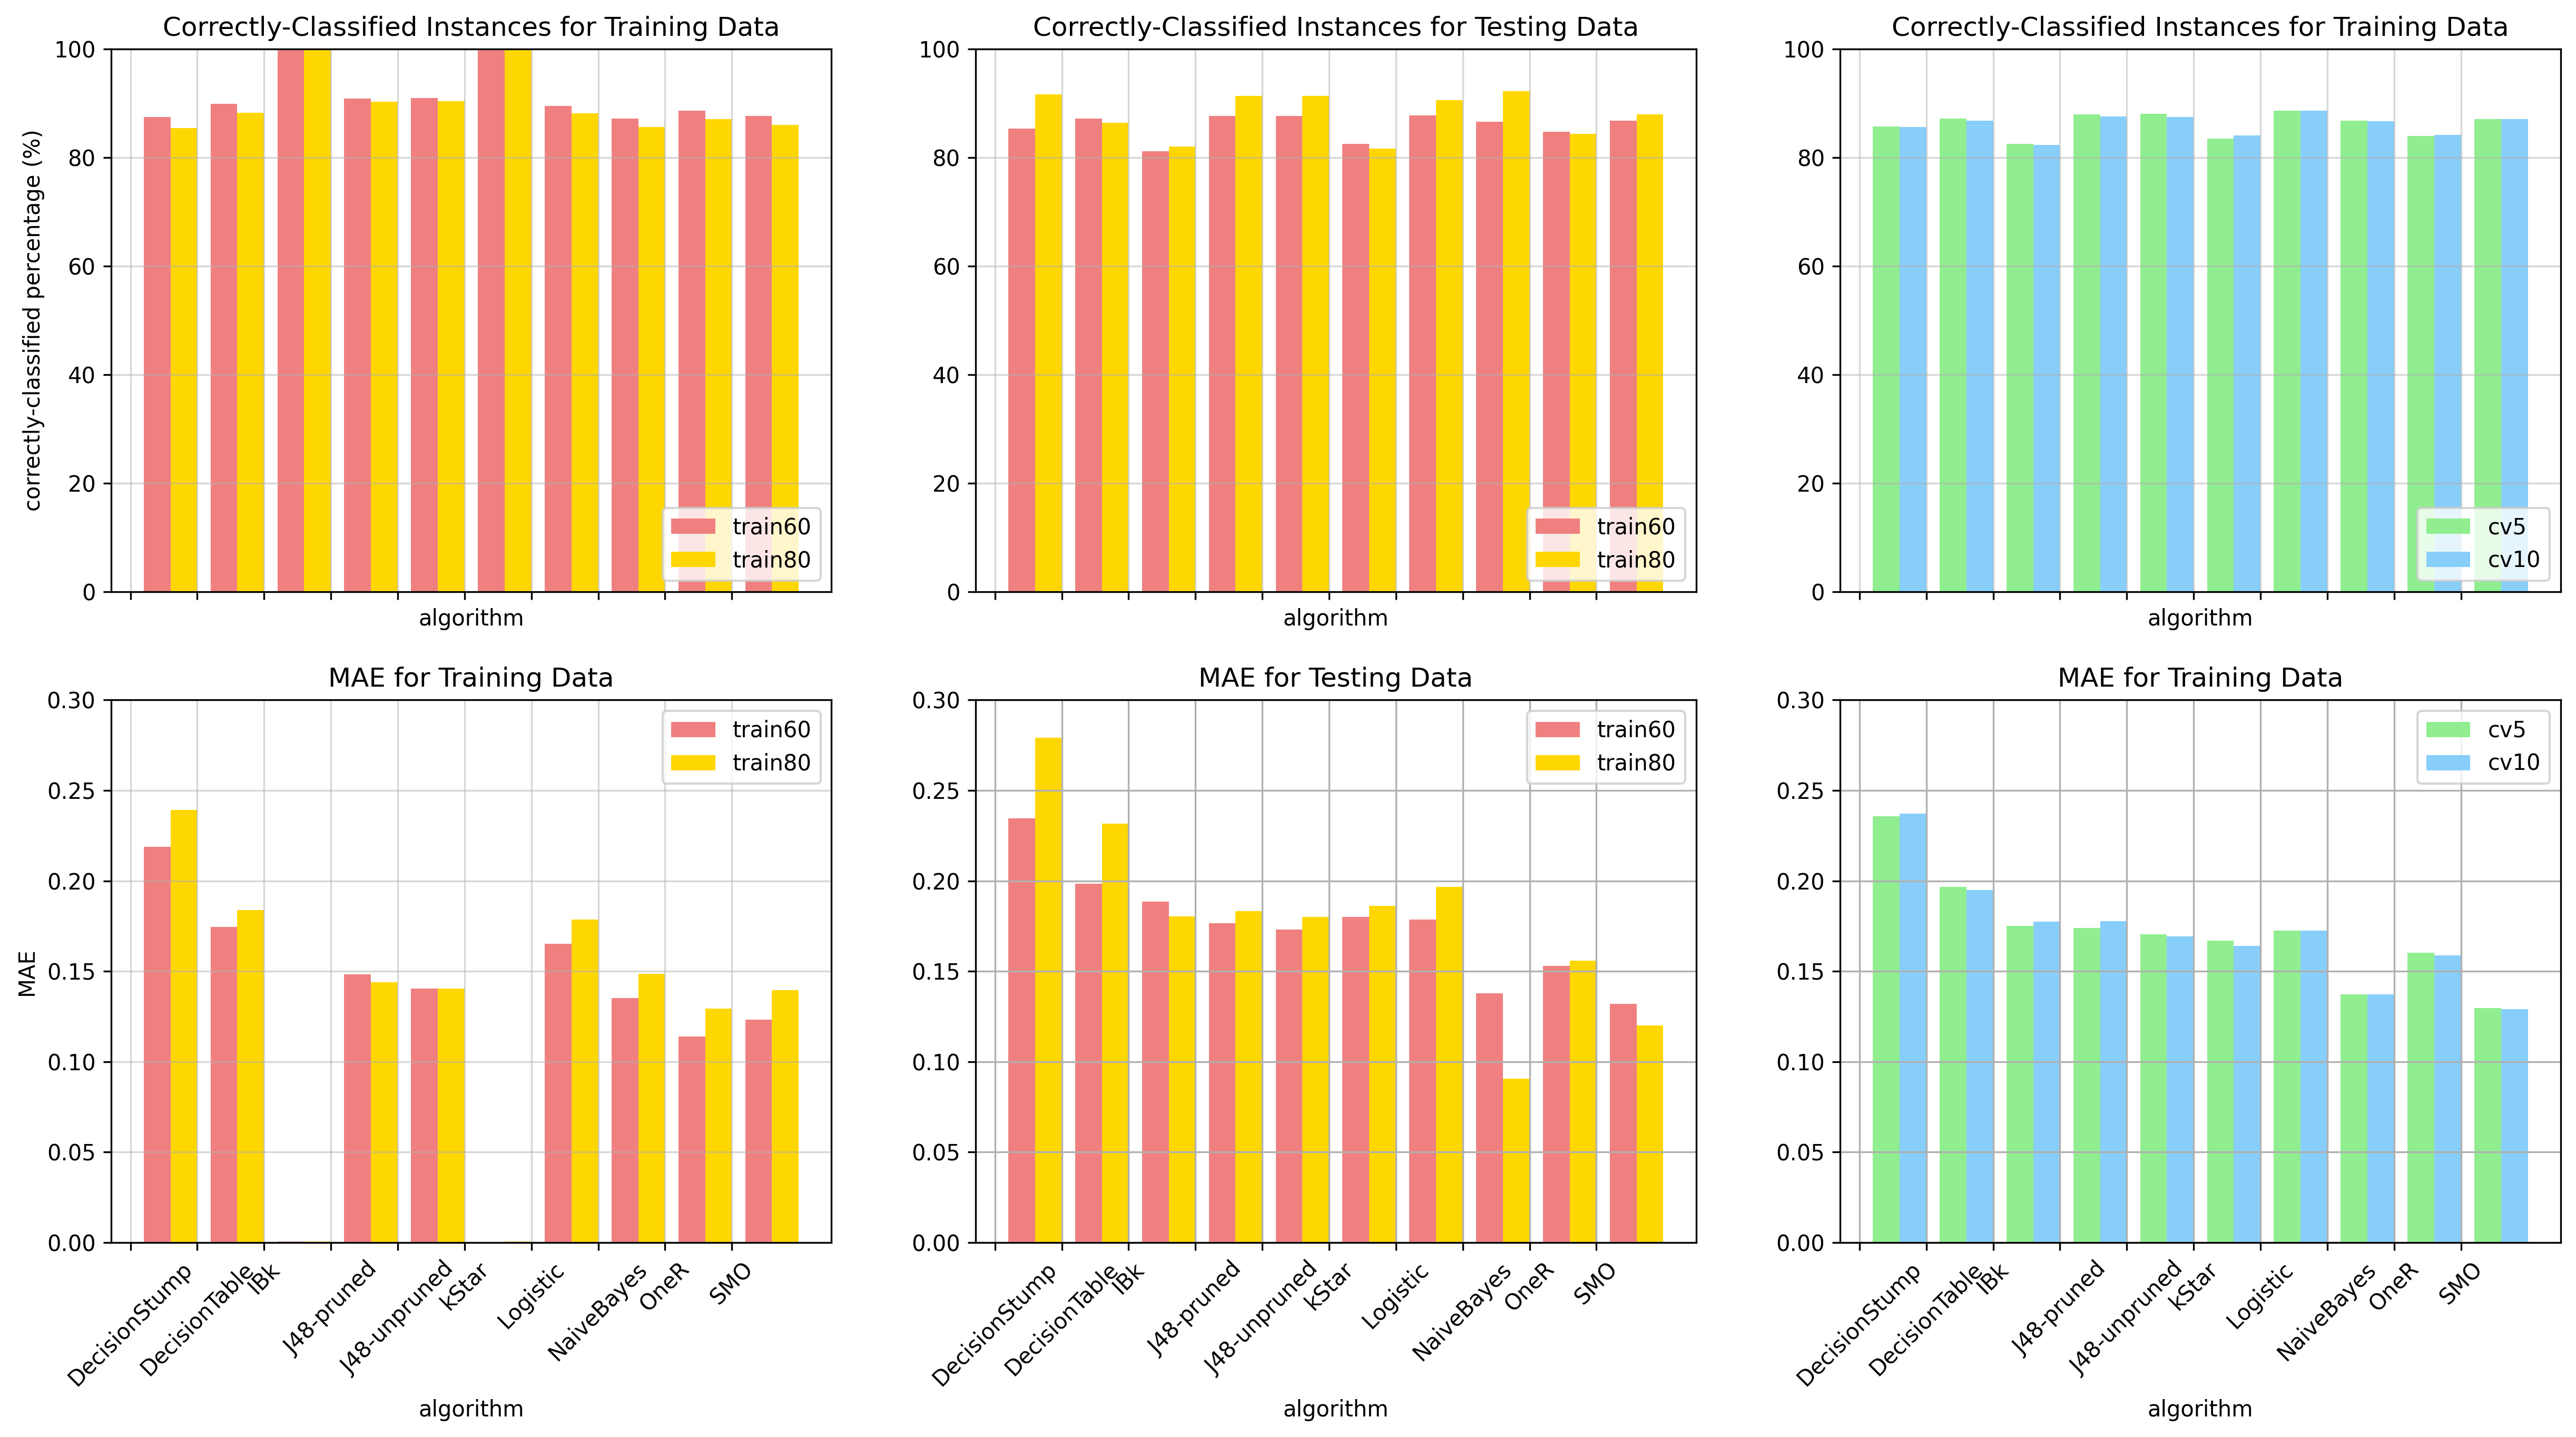

In [19]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(20, 10), dpi=300)
x_labels = train60_tr["Algorithm"].tolist()
x_train60_tr = np.arange(len(x_labels))
width = 0.4

#row=0, col=0
ax[0, 0].bar(x_train60_tr+width,train60_tr["CorrectPercent"],width,color="lightcoral",alpha=1,label="train60") 
ax[0, 0].bar(x_train60_tr+width*2,train80_tr["CorrectPercent"],width,color="gold",alpha=1,label="train80")
ax[0, 0].grid(True,alpha=0.5)
ax[0, 0].set_ylim(0,100)
ax[0, 0].set_xlabel("algorithm")
ax[0, 0].set_ylabel("correctly-classified percentage (%)")
ax[0, 0].set_title("Correctly-Classified Instances for Training Data")
ax[0, 0].legend(loc='lower right')

#row=0, col=1
ax[0, 1].bar(x_train60_tr+width,train60_te["CorrectPercent"],width,color="lightcoral",alpha=1,label="train60") 
ax[0, 1].bar(x_train60_tr+width*2,train80_te["CorrectPercent"],width,color="gold",alpha=1,label="train80")
ax[0, 1].grid(True,alpha=0.5)
ax[0, 1].set_ylim(0,100)
ax[0, 1].set_xlabel("algorithm")
# ax[0, 1].set_ylabel("correctly-classified percentage (%)")
ax[0, 1].set_title("Correctly-Classified Instances for Testing Data")
ax[0, 1].legend(loc='lower right')

#row=0, col=2
ax[0, 2].bar(x_train60_tr+width,cv5["CorrectPercent"],width,color="lightgreen",alpha=1,label="cv5") 
ax[0, 2].bar(x_train60_tr+width*2,cv10["CorrectPercent"],width,color="lightskyblue",alpha=1,label="cv10")
ax[0, 2].grid(True,alpha=0.5)
ax[0, 2].set_ylim(0,100)
ax[0, 2].set_xlabel("algorithm")
# ax[0, 2].set_ylabel("correctly-classified percentage (%)")
ax[0, 2].set_title("Correctly-Classified Instances for Training Data")
ax[0, 2].legend(loc='lower right')

#row=1, col=0
ax[1, 0].bar(x_train60_tr+width,train60_tr["MAE"],width,color="lightcoral",alpha=1,label="train60") #row=0, col=0
ax[1, 0].bar(x_train60_tr+width*2,train80_tr["MAE"],width,color="gold",alpha=1,label="train80")
ax[1, 0].grid(True,alpha=0.5)
ax[1, 0].set_ylim(0,0.3)
ax[1, 0].set_xlabel("algorithm")
ax[1, 0].set_ylabel("MAE")
ax[1, 0].set_title("MAE for Training Data")
ax[1, 0].legend()
ax[1, 0].set_xticks(x_train60_tr, x_labels, rotation=45)
# plt.xticks(rotation=45)

#row=1, col=1
ax[1, 1].bar(x_train60_tr+width,train60_te["MAE"],width,color="lightcoral",alpha=1,label="train60") 
ax[1, 1].bar(x_train60_tr+width*2,train80_te["MAE"],width,color="gold",alpha=1,label="train80")
ax[1, 1].grid(True)
ax[1, 1].set_ylim(0,0.3)
ax[1, 1].set_xlabel("algorithm")
# ax[1, 1].set_ylabel("MAE")
ax[1, 1].set_title("MAE for Testing Data")
ax[1, 1].legend()
ax[1, 1].set_xticks(x_train60_tr, x_labels, rotation=45)

#row=1, col=2
ax12_cv5 = ax[1, 2].bar(x_train60_tr+width,cv5["MAE"],width,color="lightgreen",alpha=1,label="cv5") #row=0, col=0
ax[1, 2].bar(x_train60_tr+width*2,cv10["MAE"],width,color="lightskyblue",alpha=1,label="cv10")
ax[1, 2].grid(True)
ax[1, 2].set_ylim(0,0.3)
ax[1, 2].set_xlabel("algorithm")
# ax[1, 2].set_ylabel("MAE")
ax[1, 2].set_title("MAE for Training Data")
ax[1, 2].legend()
ax[1, 2].set_xticks(x_train60_tr, x_labels, rotation=45)

plt.savefig("plots/training_and_testing_combined.jpg",dpi=300)

In [20]:
# we are now intersted in analyzing the results of the testing datasets for each percentage data split
print(train60_te.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])
print(train80_te.sort_values('CorrectPercent',ascending=False)[['Algorithm','CorrectPercent']])

        Algorithm  CorrectPercent
13       Logistic            87.8
7      J48-pruned            87.7
9    J48-unpruned            87.7
3   DecisionTable            87.2
19            SMO            86.8
15     NaiveBayes            86.6
1   DecisionStump            85.3
17           OneR            84.7
11          kStar            82.5
5             IBk            81.2
        Algorithm  CorrectPercent
35     NaiveBayes            92.2
21  DecisionStump            91.6
27     J48-pruned            91.4
29   J48-unpruned            91.4
33       Logistic            90.6
39            SMO            88.0
23  DecisionTable            86.4
37           OneR            84.4
25            IBk            82.0
31          kStar            81.6


In [21]:
# we will rank the Mean Absolute Error (MAE) for each algorithm together to compare the testing data sets
print(train60_te.sort_values('MAE',ascending=False)[['Algorithm','MAE']])
print(train80_te.sort_values('MAE',ascending=False)[['Algorithm','MAE']])

        Algorithm     MAE
1   DecisionStump  0.2346
3   DecisionTable  0.1985
5             IBk  0.1884
11          kStar  0.1800
13       Logistic  0.1786
7      J48-pruned  0.1765
9    J48-unpruned  0.1732
17           OneR  0.1530
15     NaiveBayes  0.1377
19            SMO  0.1320
        Algorithm     MAE
21  DecisionStump  0.2792
23  DecisionTable  0.2316
33       Logistic  0.1968
31          kStar  0.1861
27     J48-pruned  0.1833
25            IBk  0.1803
29   J48-unpruned  0.1801
37           OneR  0.1560
39            SMO  0.1200
35     NaiveBayes  0.0905


In [22]:
# we want to find the average percentage of correctly-classified instances and MAE 
# for all algorithms for each percentage data split

print("Avg. Percentage of Correctly-Classified Instances for train60-te: ",np.average(train60_te['CorrectPercent']))
print("Avg. Percentage of Correctly-Classified Instances for train80-te: ",np.average(train80_te['CorrectPercent']))
# difference between train60-te and train80-te testing data splits
print("Difference: ",np.abs(np.average(train60_te['CorrectPercent'])-np.average(train80_te['CorrectPercent'])))

print("Avg. MAE for train60-te: ",np.average(train60_te['MAE']))
print("Avg. MAE for train80-te: ",np.average(train80_te['MAE']))
# difference between train60-te and train80-te testing data splits
print("Difference ",np.abs(np.average(train60_te['MAE'])-np.average(train80_te['MAE'])))

Avg. Percentage of Correctly-Classified Instances for train60-te:  85.75
Avg. Percentage of Correctly-Classified Instances for train80-te:  87.96000000000001
Difference:  2.210000000000008
Avg. MAE for train60-te:  0.17525
Avg. MAE for train80-te:  0.18039
Difference  0.005140000000000006


We note that the testing data for train60-te and train80-te have correctly classified at least 80\% of all instances. Specifically, the lowest percentage of correctly-classified instances was 81.2\% for the IBk algorithm for the train60-te dataset split, followed by 81.6\% for the k-Star algorithm for the train80-te dataset split. 

For both of these dataset splits, the OneR, IBk, and k-Star algorithms rank in the bottom-third of correctly-classified instances. For the train60-te dataset split, the highest percentage of correctly-classified instances was 87.8\% returned by the Logistic Regression algorithm, and for the train80-te dataset split, the highest percentage of correctly-classified instances was 92.2\%, returned by the Naive Bayes algorithm.

In general, we note that the percentage of correctly-classified instances for the train60-te dataset split is an average of 85.75\%, whereas for the train80-te dataset split, the average is 87.96\%. The train80-te dataset split correctly classifies the data instances 2.21\% higher, on average, compared to the train60-te dataset split.

The MAE for the testing data is highly variable, however. For both train60/80-te dataset splits, the DecisionStump and DecisionTable consistently returned the highest MAE, indicating that they may not be good algorithms for the tested data. The lowest MAE for train60-te was 0.1320, returned by the SMO algorithm, and the lowest MAE for train80-te was 0.0905, returned by the NaiveBayes algorithm.

From this, we infer that having a higher training-to-testing data split may perform better, coupled with the SMO, Logistic Regression and/or NaiveBayes algorithms.

### Statistics Evaluation

Finally, we will examine statistical measures of the "goodness" of each algorithm on each of the 6 subsets of training/testing data splits.

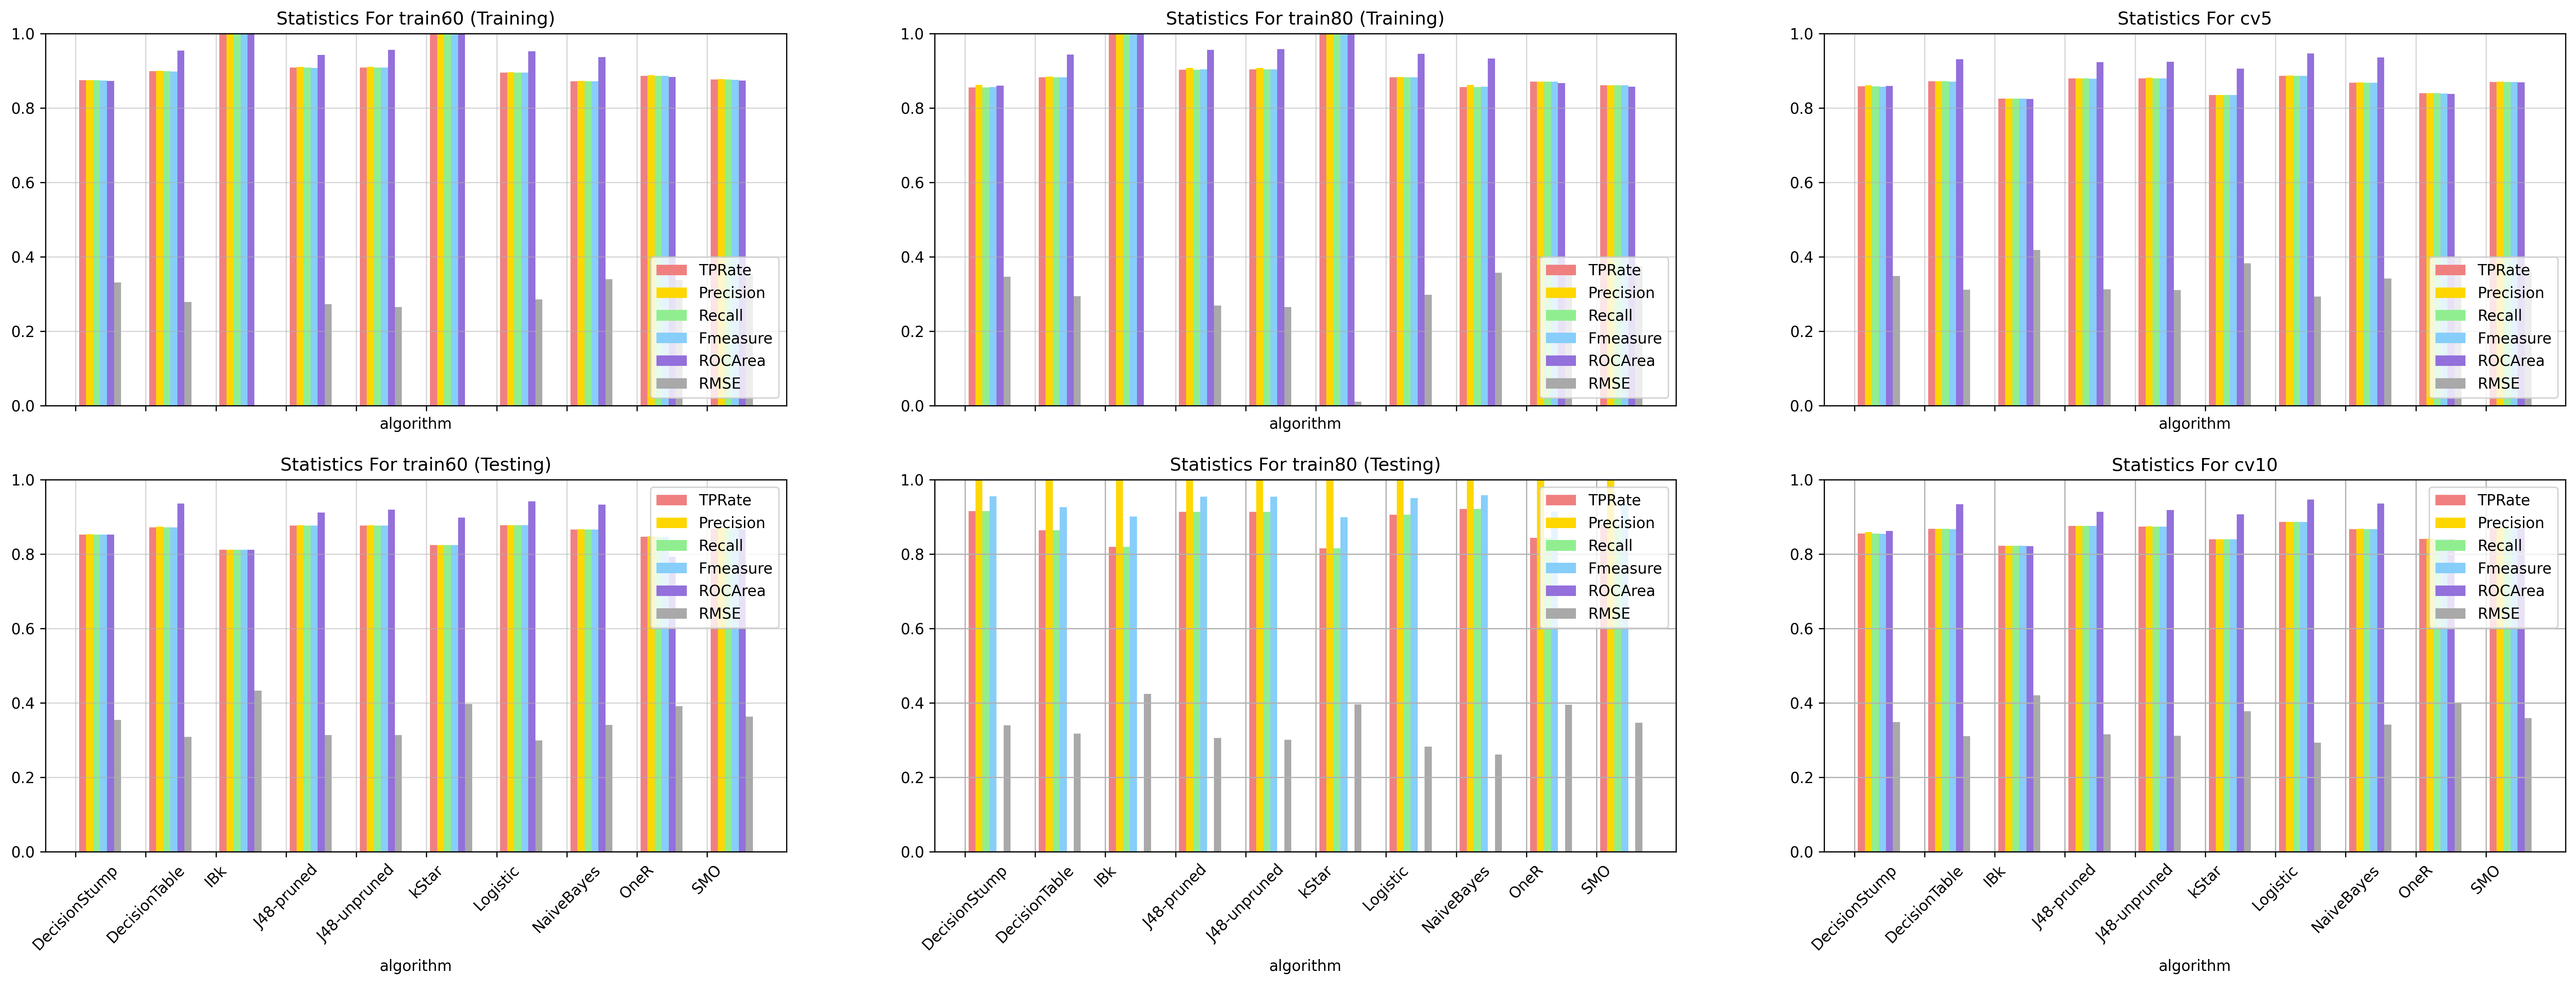

In [23]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(30, 10), dpi=300)
x_labels = train60_tr["Algorithm"].tolist()
x_train60_tr = np.arange(len(x_labels))
width = 0.1

#row=0, col=0
ax[0, 0].bar(x_train60_tr+width,train60_tr["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") 
ax[0, 0].bar(x_train60_tr+width*2,train60_tr["Precision"],width,color="gold",alpha=1,label="Precision")
ax[0, 0].bar(x_train60_tr+width*3,train60_tr["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[0, 0].bar(x_train60_tr+width*4,train60_tr["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[0, 0].bar(x_train60_tr+width*5,train60_tr["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[0, 0].bar(x_train60_tr+width*6,train60_tr["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[0, 0].grid(True,alpha=0.5)
ax[0, 0].set_ylim(0,1)
ax[0, 0].set_xlabel("algorithm")
# ax[0, 0].set_ylabel("correctly-classified percentage (%)")
ax[0, 0].set_title("Statistics For train60 (Training)")
ax[0, 0].legend(loc='lower right')

#row=0, col=1
ax[0, 1].bar(x_train60_tr+width,train80_tr["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") 
ax[0, 1].bar(x_train60_tr+width*2,train80_tr["Precision"],width,color="gold",alpha=1,label="Precision")
ax[0, 1].bar(x_train60_tr+width*3,train80_tr["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[0, 1].bar(x_train60_tr+width*4,train80_tr["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[0, 1].bar(x_train60_tr+width*5,train80_tr["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[0, 1].bar(x_train60_tr+width*6,train80_tr["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[0, 1].grid(True,alpha=0.5)
ax[0, 1].set_ylim(0,1)
ax[0, 1].set_xlabel("algorithm")
# ax[0, 1].set_ylabel("correctly-classified percentage (%)")
ax[0, 1].set_title("Statistics For train80 (Training)")
ax[0, 1].legend(loc='lower right')

#row=0, col=2
ax[0, 2].bar(x_train60_tr+width,cv5["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") 
ax[0, 2].bar(x_train60_tr+width*2,cv5["Precision"],width,color="gold",alpha=1,label="Precision")
ax[0, 2].bar(x_train60_tr+width*3,cv5["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[0, 2].bar(x_train60_tr+width*4,cv5["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[0, 2].bar(x_train60_tr+width*5,cv5["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[0, 2].bar(x_train60_tr+width*6,cv5["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[0, 2].grid(True,alpha=0.5)
ax[0, 2].set_ylim(0,1)
ax[0, 2].set_xlabel("algorithm")
# ax[0, 2].set_ylabel("correctly-classified percentage (%)")
ax[0, 2].set_title("Statistics For cv5")
ax[0, 2].legend(loc='lower right')

#row=1, col=0
ax[1, 0].bar(x_train60_tr+width,train60_te["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") #row=0, col=0
ax[1, 0].bar(x_train60_tr+width*2,train60_te["Precision"],width,color="gold",alpha=1,label="Precision")
ax[1, 0].bar(x_train60_tr+width*3,train60_te["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[1, 0].bar(x_train60_tr+width*4,train60_te["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[1, 0].bar(x_train60_tr+width*5,train60_te["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[1, 0].bar(x_train60_tr+width*6,train60_te["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[1, 0].grid(True,alpha=0.5)
ax[1, 0].set_ylim(0,1)
ax[1, 0].set_xlabel("algorithm")
# ax[1, 0].set_ylabel("MAE")
ax[1, 0].set_title("Statistics For train60 (Testing)")
ax[1, 0].legend()
ax[1, 0].set_xticks(x_train60_tr, x_labels, rotation=45)
# plt.xticks(rotation=45)

#row=1, col=1
ax[1, 1].bar(x_train60_tr+width,train80_te["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") 
ax[1, 1].bar(x_train60_tr+width*2,train80_te["Precision"],width,color="gold",alpha=1,label="Precision")
ax[1, 1].bar(x_train60_tr+width*3,train80_te["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[1, 1].bar(x_train60_tr+width*4,train80_te["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[1, 1].bar(x_train60_tr+width*5,train80_te["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[1, 1].bar(x_train60_tr+width*6,train80_te["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[1, 1].grid(True)
ax[1, 1].set_ylim(0,1)
ax[1, 1].set_xlabel("algorithm")
# ax[1, 1].set_ylabel("MAE")
ax[1, 1].set_title("Statistics For train80 (Testing)")
ax[1, 1].legend()
ax[1, 1].set_xticks(x_train60_tr, x_labels, rotation=45)

#row=1, col=2
ax[1, 2].bar(x_train60_tr+width,cv10["TPRate"],width,color="lightcoral",alpha=1,label="TPRate") #row=0, col=0
ax[1, 2].bar(x_train60_tr+width*2,cv10["Precision"],width,color="gold",alpha=1,label="Precision")
ax[1, 2].bar(x_train60_tr+width*3,cv10["Recall"],width,color="lightgreen",alpha=1,label="Recall")
ax[1, 2].bar(x_train60_tr+width*4,cv10["Fmeasure"],width,color="lightskyblue",alpha=1,label="Fmeasure")
ax[1, 2].bar(x_train60_tr+width*5,cv10["ROCArea"],width,color="mediumpurple",alpha=1,label="ROCArea")
ax[1, 2].bar(x_train60_tr+width*6,cv10["RMSE"],width,color="darkgrey",alpha=1,label="RMSE")
ax[1, 2].grid(True)
ax[1, 2].set_ylim(0,1)
ax[1, 2].set_xlabel("algorithm")
# ax[1, 2].set_ylabel("MAE")
ax[1, 2].set_title("Statistics For cv10")
ax[1, 2].legend()
ax[1, 2].set_xticks(x_train60_tr, x_labels, rotation=45)

plt.savefig("plots/statistics_combined.jpg",dpi=300)

In general, we note that the ROC Area for all 6 dataset splits was higher than TP Rate, Precision, Recall, F-Measure, which were fairly consistent with each other. The exception to this trend is seen in the train60-tr and train80-tr dataset split, where all 5 metrics (except RMSE) were equal to 1 for the IBk and k-Star algorithms. An interesting trend is noticed in the train80-te dataset split, where the ROC Area for all algorithms is a missing value. The pattern for the other metrics for all algorithms for the train80-te are seen to be consistent, however. The metrics for cv5 and cv10 are also consistent with each other, showing that there is no major difference in performance for the $n$-fold cross-validation method, but there is a noticeable difference in performance for the percentage split method.

## Model Evaluation

We will now evaluate the combination which provides the best possible classification for the pumpkin seeds.

The IBk and k-Star algorithms did not perform well and reliably on either of the train60/80 or cv5/cv10 datasets. The top three algorithms across all dataset splits were found to be the Naive Bayes, Logistic Regression, and SMO. The performance of the J48 algorithm across all the dataset splits did not vary considerably using either a pruned or unpruned option. The OneR, Decision Stump, and Decision Table algorithms performed average across the dataset splits. 

In terms of the dataset splits, there was no considerable difference between the 5-fold cross-validation and the 10-fold cross-validation techniques. The 80/20\% data split returned a higher percentage of correctly-classified instances, however this corresponded with a higher MAE, as compared to the 60/40\% data split.

Thus we infer that using a relatively high percentage split (between 60-80\% for training) on the dataset, coupled with an algorithm such as Naive Bayes, Logistic Regression, or SMO is likely to provide more accurate classification results for predicting the class type of pumpkin seeds. This is a similar result obtained in the source article for this dataset ([Koklu et al., 2021](https://link.springer.com/article/10.1007/s10722-021-01226-0)), where the Logistic Regression algorithm performed on the dataset with a 10-fold cross validation method was found to be one of the best algorithms used for classifying the pumpkin seeds.

## Conclusion

In this research, 10 classification algorithms (DecisionStump, DecisionTable, IBk, OneR, C4.5 pruned, C4.5 unpruned, Logistic Regression, k-Star, Naive Bayes, and SMO) were evaluated on 2 types of data splits: $n$-percentage training/testing data splits (60/40\% split, and 80/20\% split), and $n$-fold cross-validation ($n=5$ and $n=10$) for the 'Pumpkin Seeds' dataset. A detailed analysis of the classifcation results was performed in order to determine the best algorithm and data split for this dataset. From the analysis, we infer that using a percentage split (between 60-80\%) rather than $n$-fold cross-validation, coupled with any of Naive Bayes, Logistic Regression and/or SMO algorithms, is likely to yield the best classification results possible for the pumpkin seeds dataset.